In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os
import numpy as np

In [15]:
load_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\Deadtime_Experiments\Figures\evaluation_loss'
df_dtime = pd.read_csv(load_dir + r'/eval_loss_dtimeTrue_order4-14_shots1E+04.csv')
df_pois = pd.read_csv(load_dir + r'/eval_loss_dtimeFalse_order4-14_shots1E+04.csv')
OD = df_dtime['OD'][:-1]
eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
eval_loss_pois = df_pois['Evaluation Loss'].dropna()
percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
optimal_C = df_dtime['Optimal Scaling Factor'].dropna()
OD_C = df_dtime['Hypothetical Scaling Factor'][:-1]

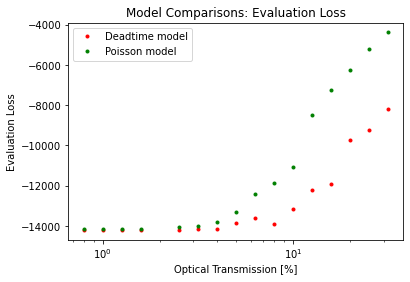

In [16]:
# Plot Eval Loss vs OD

transmit_factor = 10**(-OD)
atten_factor = 1-transmit_factor

fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(OD, eval_loss_dtime, 'r.', label='Deadtime model')
# ax.plot(OD, eval_loss_pois, 'g.', label='Poisson model')
ax.plot(transmit_factor*100, eval_loss_dtime, 'r.', label='Deadtime model')
ax.plot(transmit_factor*100, eval_loss_pois, 'g.', label='Poisson model')
# ax.set_xlabel('OD')
ax.set_xlabel('Optical Transmission [%]')
ax.set_ylabel('Evaluation Loss')
ax.set_title('Model Comparisons: Evaluation Loss')
# ax.set_xlim([88, 100])
# ax.set_ylim([-145000, -100000])
plt.xscale('log')
plt.legend()
plt.show()

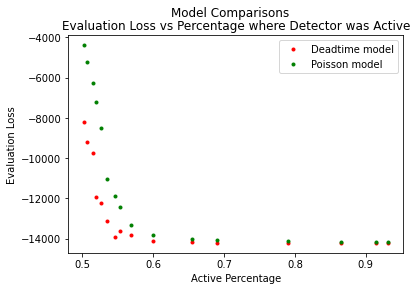

In [17]:
# Plot Eval Loss vs Average Active-Detector Percentage

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(percent_active, eval_loss_dtime, 'r.', label='Deadtime model')
ax.plot(percent_active, eval_loss_pois, 'g.', label='Poisson model')
ax.set_xlabel('Active Percentage')
ax.set_ylabel('Evaluation Loss')
plt.suptitle('Model Comparisons')
plt.title('Evaluation Loss vs Percentage where Detector was Active')
plt.legend()
plt.show()

In [5]:
print(optimal_C)
print(OD_C)

0     0.007475
1     0.010345
2     0.010150
3     0.013087
4     0.016186
5     0.015576
6     0.015368
7     0.017264
8     0.022822
9     0.031883
10    0.047900
11    0.060295
12    0.114061
13    0.199960
14    0.335850
15    0.433892
Name: Optimal Scaling Factor, dtype: float64
0     0.015849
1     0.019953
2     0.025119
3     0.031623
4     0.039811
5     0.050119
6     0.063096
7     0.079433
8     0.100000
9     0.125893
10    0.158489
11    0.199526
12    0.316228
13    0.398107
14    0.501187
15    0.630957
Name: Hypothetical Scaling Factor, dtype: float64


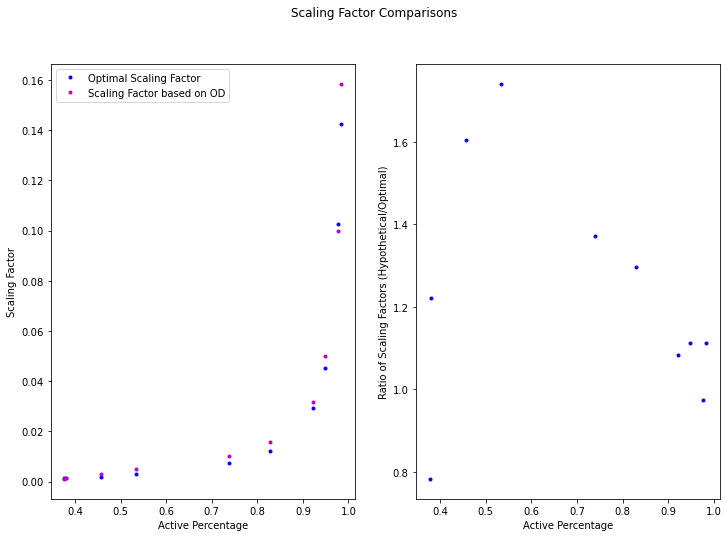

In [18]:
# Plot scaling factors vs Average Active-Detector Percentage

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax1.plot(percent_active, optimal_C, 'b.', label='Optimal Scaling Factor')
ax1.plot(percent_active, OD_C, 'm.', label='Scaling Factor based on OD')
ax1.set_xlabel('Active Percentage')
ax1.set_ylabel('Scaling Factor')
ax2 = fig.add_subplot(122)
ax2.plot(percent_active, OD_C/optimal_C, 'b.', label='Optimal Scaling Factor')
ax2.set_xlabel('Active Percentage')
ax2.set_ylabel('Ratio of Scaling Factors (Hypothetical/Optimal)')
plt.suptitle('Scaling Factor Comparisons')
ax1.legend()
plt.show()

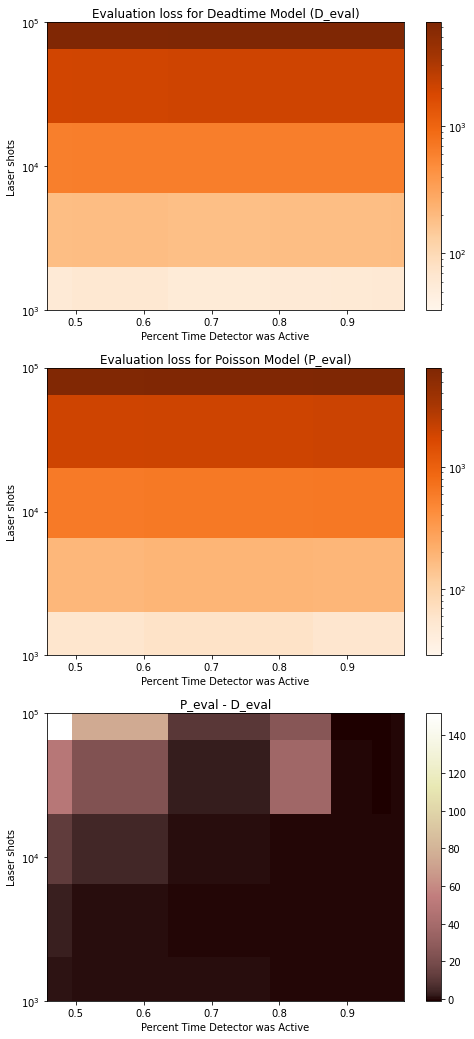

In [21]:
from matplotlib.colors import LogNorm

load_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\Deadtime_Experiments\Figures\evaluation_loss\iter_num_shots_test2'
files = []
eval_loss_dtime_full = []
num_shot_full = []
for file in os.listdir(load_dir):
    if file.endswith('.csv'):
        files.append(r'/'+file)
        df_dtime = pd.read_csv(load_dir + r'/'+file)
        num_shot = float(file[-9:-4])
        OD = df_dtime['OD'][:-1]
        eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
        percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
        optimal_C = df_dtime['Optimal Scaling Factor'].dropna()
        OD_C = df_dtime['Hypothetical Scaling Factor'][:-1]
        
        num_shot_full.append(num_shot)
        eval_loss_dtime_full.append(eval_loss_dtime)
        
max_lsr_num_lst = np.floor(np.logspace(3, 7, 16)).astype(int)[:-4]

reorder = np.argsort(num_shot_full).astype(int)
num_shot_full = np.array(num_shot_full)[reorder]
eval_loss_dtime_full = np.array(eval_loss_dtime_full)[reorder]
eval_loss_dtime_dead = -1*eval_loss_dtime_full[1::2]
num_shot_dead = num_shot_full[1::2]
eval_loss_dtime_pois = -1*eval_loss_dtime_full[0::2]
num_shot_pois = num_shot_full[0::2]

# print(eval_loss_dtime_full)

fig = plt.figure(figsize=(8,18))
ax1 = fig.add_subplot(311)
c = ax1.pcolormesh(percent_active[2:], num_shot_dead, eval_loss_dtime_dead[:, 2:], norm=LogNorm(eval_loss_dtime_dead.min(), eval_loss_dtime_dead.max()), cmap='Oranges')
ax1.axis([percent_active[2:].min(), percent_active.max(), min(num_shot_dead), max(num_shot_dead)])
ax1.set_ylabel('Laser shots')
ax1.set_xlabel('Percent Time Detector was Active')
ax1.set_title('Evaluation loss for Deadtime Model (D_eval)')
ax1.set_yscale('symlog')
fig.colorbar(c, ax=ax1)

ax2 = fig.add_subplot(312)
c = ax2.pcolormesh(OD[2:], num_shot_pois, eval_loss_dtime_pois[:, 2:], norm=LogNorm(eval_loss_dtime_pois.min(), eval_loss_dtime_pois.max()), cmap='Oranges')
ax2.axis([percent_active[2:].min(), percent_active.max(), min(num_shot_pois), max(num_shot_pois)])
ax2.set_ylabel('Laser shots')
ax2.set_xlabel('Percent Time Detector was Active')
ax2.set_title('Evaluation loss for Poisson Model (P_eval)')
ax2.set_yscale('symlog')
fig.colorbar(c, ax=ax2)

ax3 = fig.add_subplot(313)
c = ax3.pcolormesh(percent_active[2:], num_shot_dead, (eval_loss_dtime_dead-eval_loss_dtime_pois)[:, 2:], cmap='pink')
ax3.axis([percent_active[2:].min(), percent_active.max(), min(num_shot_dead), max(num_shot_dead)])
ax3.set_ylabel('Laser shots')
ax3.set_xlabel('Percent Time Detector was Active')
ax3.set_title("P_eval - D_eval")
ax3.set_yscale('symlog')
fig.colorbar(c, ax=ax3)

# ax2 = fig.add_subplot(212, projection='3d')
# xv_dead, yv_dead = np.meshgrid(OD, np.log10(num_shot_dead), indexing='ij')
# xv_pois, yv_pois = np.meshgrid(OD, np.log10(num_shot_pois), indexing='ij')
# ax2.scatter(xv_dead[2:, :], yv_dead[2:, :], eval_loss_dtime_dead.T[2:, :], c='green', label='Deadtime model')
# ax2.scatter(xv_pois[2:, :], yv_pois[2:, :], eval_loss_dtime_pois.T[2:, :], c='blue', label='Poisson model')
# ax2.set_xlabel('OD')
# ax2.set_ylabel('log10(Laser shots)')
# ax2.set_zlabel('Evaluation Loss')
# ax2.set_yscale('symlog')
# # ax2.set_xlim([OD.min(), OD.max()])
# plt.legend()

plt.show()


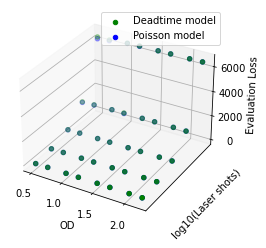

In [22]:
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
xv_dead, yv_dead = np.meshgrid(OD, np.log10(num_shot_dead), indexing='ij')
xv_pois, yv_pois = np.meshgrid(OD, np.log10(num_shot_pois), indexing='ij')
ax2.scatter(xv_dead[2:, :], yv_dead[2:, :], eval_loss_dtime_dead.T[2:, :], c='green', label='Deadtime model')
ax2.scatter(xv_pois[2:, :], yv_pois[2:, :], eval_loss_dtime_pois.T[2:, :], c='blue', label='Poisson model')
ax2.set_xlabel('OD')
ax2.set_ylabel('log10(Laser shots)')
ax2.set_zlabel('Evaluation Loss')
ax2.set_yscale('symlog')
# ax2.set_xlim([OD.min(), OD.max()])
plt.legend()

plt.show()